In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import xgboost as xgb


In [232]:
df = pd.read_csv("C:/Users/Utilizador/Desktop/Lab11_Files/Lab11_Files/6-7-edition/Hackthon classification/6h edition/data/Student Depression Dataset.csv")

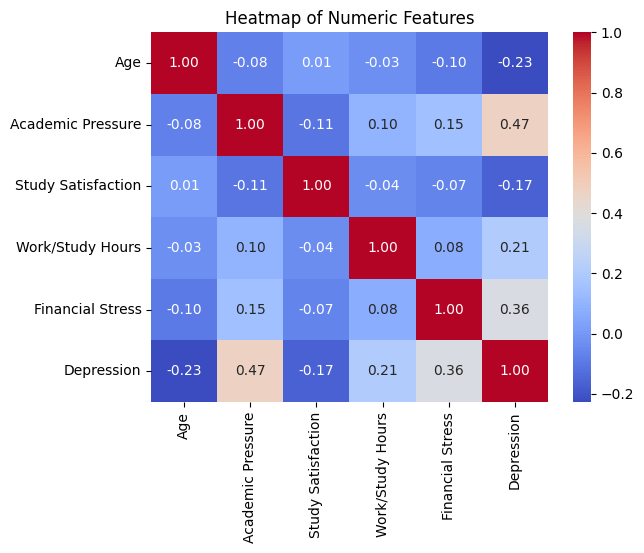

In [233]:
df = df.dropna()
df.dtypes


df = df.drop(columns=["id", "Work Pressure", "Job Satisfaction", "CGPA"])
numeric_df = df.select_dtypes(include=["number"])
# Generate the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Numeric Features")
plt.show()



In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
# Split data into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# One-Hot Encoding on categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train[["Gender", "City", "Profession", "Family History of Mental Illness", 
                   'Have you ever had suicidal thoughts ?', "Dietary Habits", "Degree", "Sleep Duration"]])

# Transform train and test sets
train_encoded = encoder.transform(train[["Gender", "City", "Profession", "Family History of Mental Illness", 
                                         'Have you ever had suicidal thoughts ?', "Dietary Habits", "Degree", "Sleep Duration"]])
test_encoded = encoder.transform(test[["Gender", "City", "Profession", "Family History of Mental Illness", 
                                       'Have you ever had suicidal thoughts ?', "Dietary Habits", "Degree", "Sleep Duration"]])

# Convert to DataFrame
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out())

# Combine encoded features with numerical columns
train_full = pd.concat([train_encoded_df, train.reset_index(drop=True).select_dtypes(include=["number"]).drop("Depression", axis=1)], axis=1)
test_full = pd.concat([test_encoded_df, test.reset_index(drop=True).select_dtypes(include=["number"]).drop("Depression", axis=1)], axis=1)

# Scale the data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_full)
test_scaled = scaler.transform(test_full)

# Apply PCA on scaled data
# pca = PCA(n_components=0.80)  # Retain 95% of variance
# train_pca = pca.fit_transform(train_scaled)
# test_pca = pca.transform(test_scaled)

param_grid = [    
    {'penalty' : ['l1'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['saga'],
    'max_iter' : [30, 60]
    }
]

param_gridf = { 
    'n_estimators': [50, 100, 200], 
    'max_features': [None, 'auto', 'sqrt', 'log2'], 
    'max_depth': [6, 3, 9], 
    'max_leaf_nodes': [3, 6, 9], 
}

# Train logistic regression model
# model = RandomForestClassifier(random_state=42)
model = LogisticRegression(random_state=42)
# model.fit(train_pca, train["Depression"])  # Fit on training set
gs = GridSearchCV(model, param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1, return_train_score=True)
best_model = gs.fit(train_scaled, train["Depression"])
print(best_model.best_params_)

# Predict and evaluate
predictions = best_model.predict(test_scaled)
accuracy = accuracy_score(test["Depression"], predictions)

print(f"Model accuracy: {accuracy:.2f}")


Fitting 2 folds for each of 40 candidates, totalling 80 fits
{'C': np.float64(0.615848211066026), 'max_iter': 60, 'penalty': 'l1', 'solver': 'saga'}
Model accuracy: 0.85


C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [235]:
df.dtypes

Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object